In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
df = pd.read_csv("transactions.csv")

In [3]:
df.drop(columns=["transaction_id"], inplace=True)

In [4]:
display(df.head())                 # first 5 rows
print("Shape:", df.shape)          # (n_rows, n_cols)

print("\nDtypes:")
print(df.dtypes)                   # data types per column


,user_id,account_age_days,total_transactions_user,avg_amount_user,amount,country,bin_country,channel,merchant_category,promo_used,avs_match,cvv_result,three_ds_flag,transaction_time,shipping_distance_km,is_fraud
0,1,141,47,147.93,84.75,FR,FR,web,travel,0,1,1,1,2024-01-06T04:09:39Z,370.95,0
1,1,141,47,147.93,107.90,FR,FR,web,travel,0,0,0,0,2024-01-09T20:13:47Z,149.62,0
2,1,141,47,147.93,92.36,FR,FR,app,travel,1,1,1,1,2024-01-12T06:20:11Z,164.08,0
3,1,141,47,147.93,112.47,FR,FR,web,fashion,0,1,1,1,2024-01-15T17:00:04Z,397.40,0
4,1,141,47,147.93,132.91,FR,US,web,electronics,0,1,1,1,2024-01-17T01:27:31Z,935.28,0


Shape: (299695, 16)

Dtypes:
user_id                      int64
account_age_days             int64
total_transactions_user      int64
avg_amount_user            float64
amount                     float64
country                     object
bin_country                 object
channel                     object
merchant_category           object
promo_used                   int64
avs_match                    int64
cvv_result                   int64
three_ds_flag                int64
transaction_time            object
shipping_distance_km       float64
is_fraud                     int64
dtype: object


In [5]:
TARGET = "is_fraud"
print("Target Distribution (counts): ")
print(df[TARGET].value_counts())

Target Distribution (counts): 
is_fraud
0    293083
1      6612
Name: count, dtype: int64


In [6]:
numeric_columns = ["account_age_days", "total_transactions_user", "avg_amount_user", "amount", "shipping_distance_km"]
categoric_columns = ["promo_used", "avs_match", "cvv_result", "three_ds_flag"]
tobecategoric_columns = ["country", "bin_country", "channel", "merchant_category"]


In [7]:
df["hour"] = pd.to_datetime(df["transaction_time"]).dt.hour

In [8]:
df.drop(columns=["transaction_time"], inplace=True)

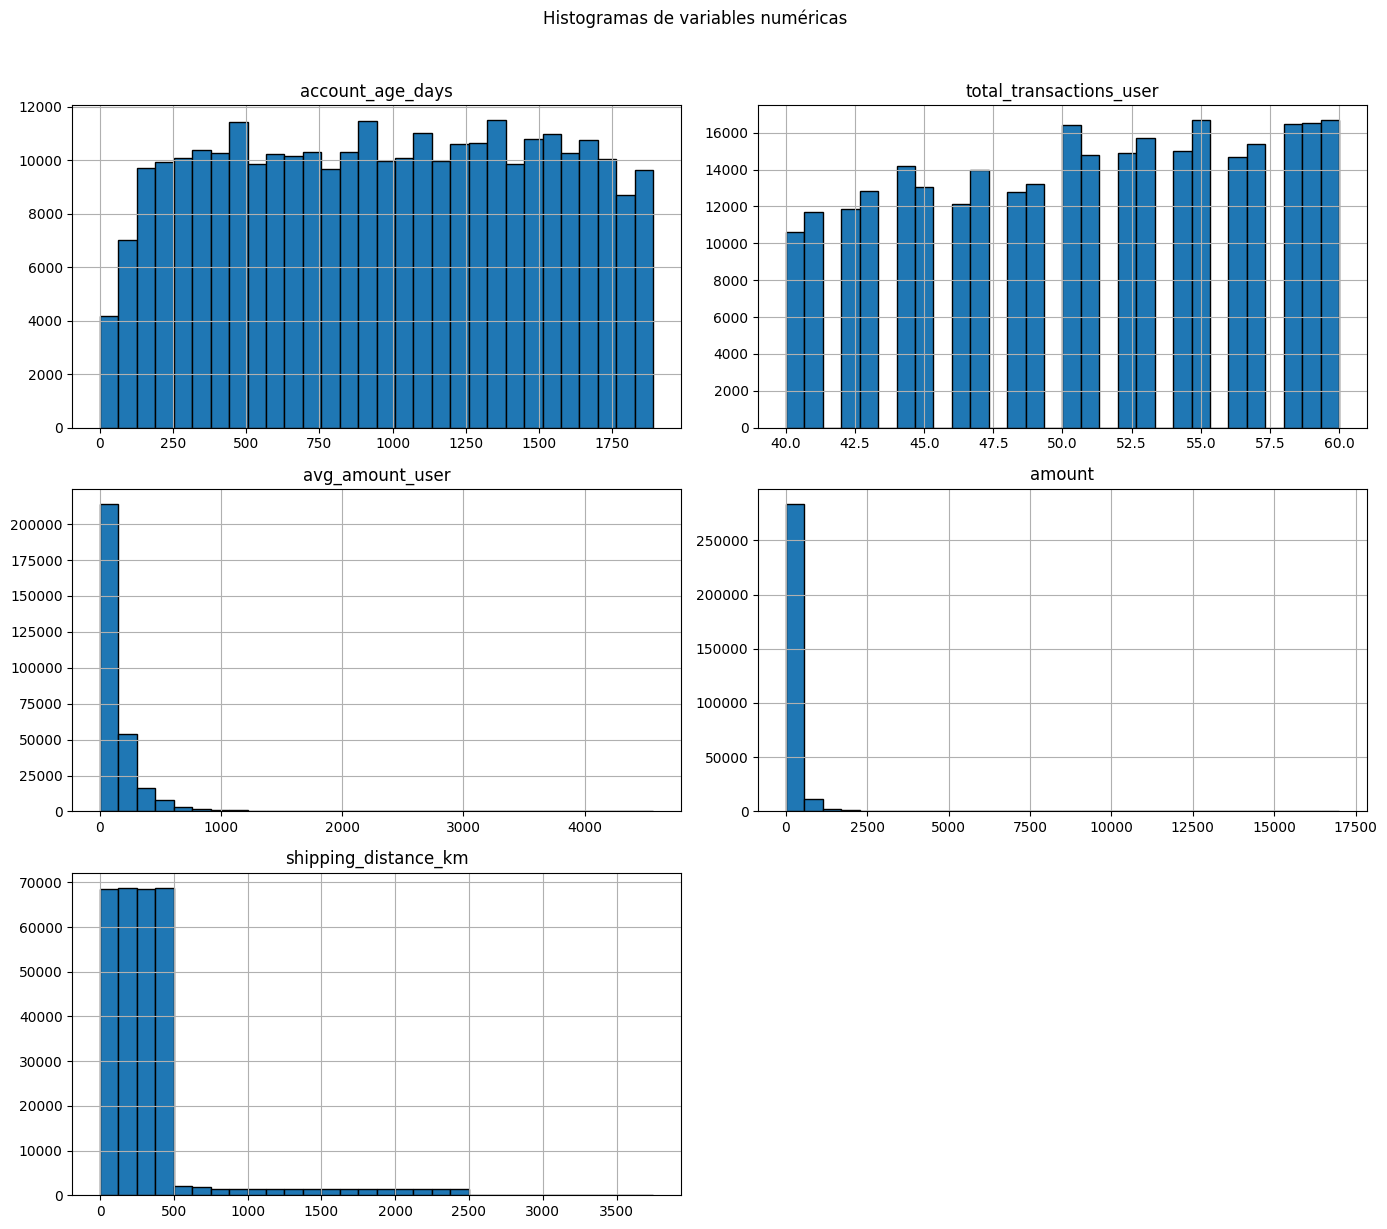

In [9]:
ax = df[numeric_columns].hist(bins=30, edgecolor="black", figsize=(14, 12))
plt.suptitle("Histogramas de variables numéricas", y=1.02)
plt.tight_layout()
plt.show()

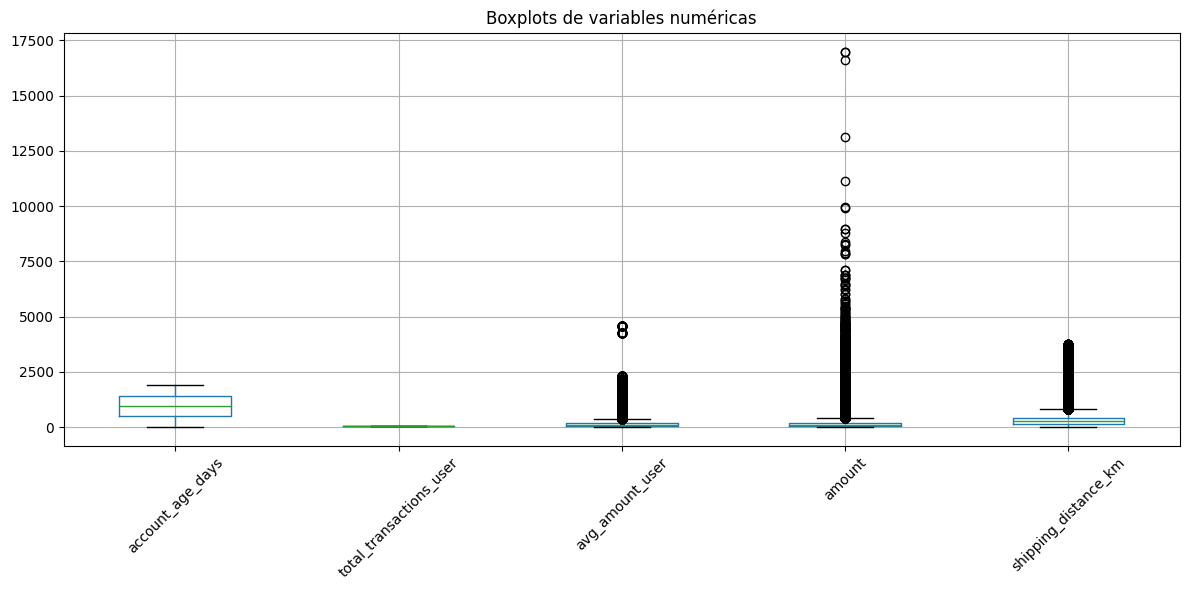

In [10]:
plt.figure(figsize=(12, 6))
df[numeric_columns].boxplot(rot=45)
plt.title("Boxplots de variables numéricas")
plt.tight_layout()
plt.show()

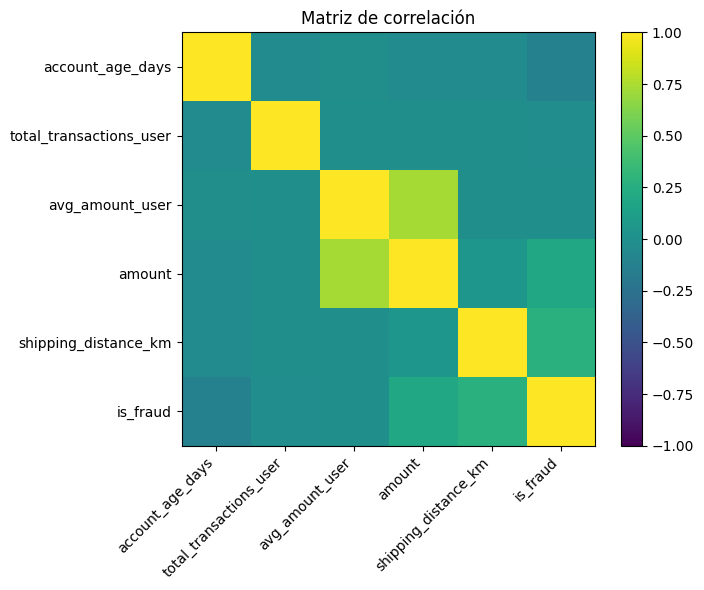

In [11]:
# 5) Mapa de correlación (entre numéricas + target)
cols_for_corr = numeric_columns + [TARGET]
corr = df[cols_for_corr].corr(numeric_only=True)

plt.figure(figsize=(8, 6))
im = plt.imshow(corr, vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(ticks=np.arange(len(cols_for_corr)), labels=cols_for_corr, rotation=45, ha="right")
plt.yticks(ticks=np.arange(len(cols_for_corr)), labels=cols_for_corr)
plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()

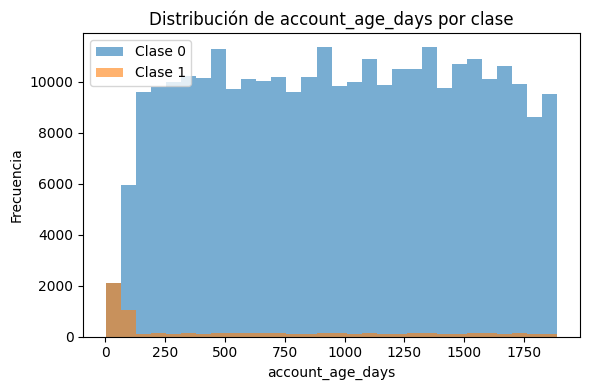

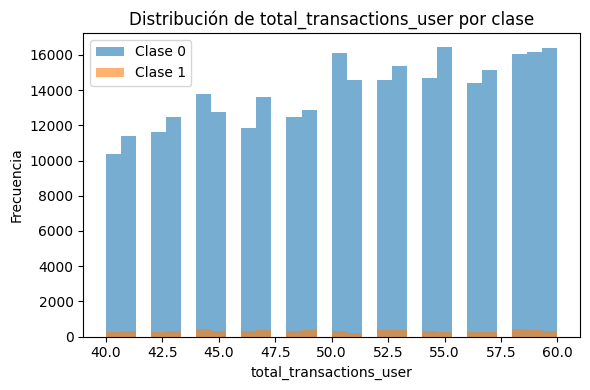

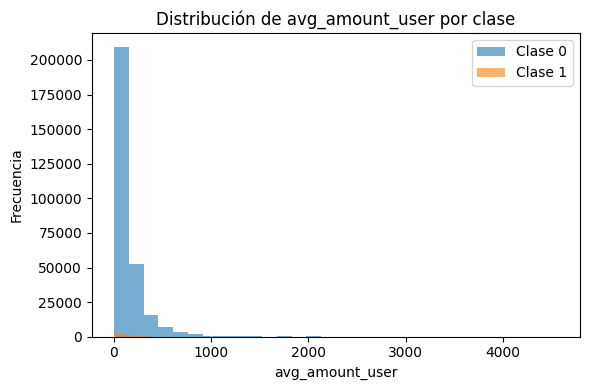

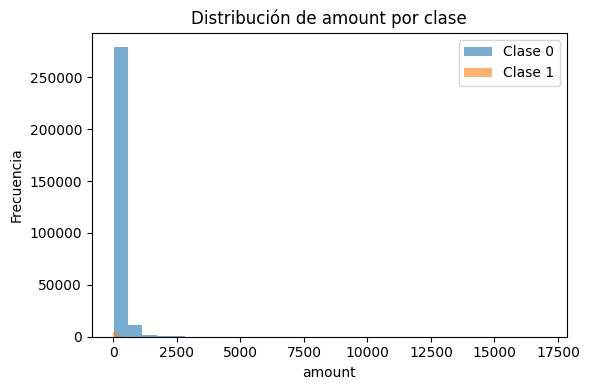

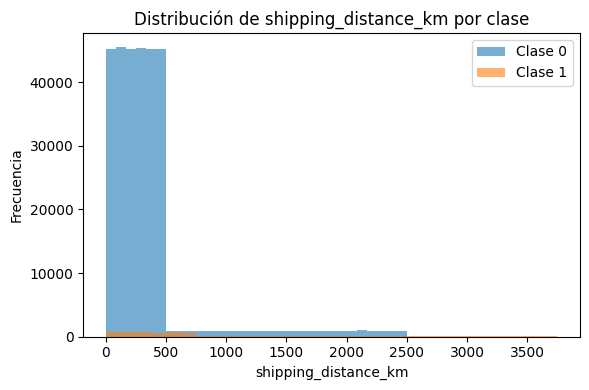

In [12]:
# 6) Distribución por clase para algunas variables clave (superpuesto)
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    # clase 0
    plt.hist(df[df[TARGET] == 0][col].dropna(), bins=30, alpha=0.6, label="Clase 0")
    # clase 1
    plt.hist(df[df[TARGET] == 1][col].dropna(), bins=30, alpha=0.6, label="Clase 1")
    plt.title(f"Distribución de {col} por clase")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Train/Val/Test split + preprocessing

In [14]:
from sklearn.model_selection import train_test_split

feature_columns = numeric_columns + categoric_columns + tobecategoric_columns + ["hour"]

df_temp, df_test = train_test_split(
    df,
    test_size=0.15,
    stratify=df[TARGET],
    random_state=42
)

df_train, df_val = train_test_split(
    df_temp,
    test_size=0.1765,
    stratify=df_temp[TARGET],
    random_state=42
)

def describe_split(name, d):
    n = len(d)
    counts = d[TARGET].value_counts(normalize=True).sort_index()
    print(f"{name}: {n} filas")
    if counts is not None:
        print(f"  proporción clase 0/1: {counts.to_dict()}")

describe_split("train", df_train)
describe_split("val", df_val)
describe_split("test", df_test)





train: 209778 filas
  proporción clase 0/1: {0: 0.9779385826921794, 1: 0.022061417307820647}
val: 44962 filas
  proporción clase 0/1: {0: 0.977936924514034, 1: 0.022063075485965925}
test: 44955 filas
  proporción clase 0/1: {0: 0.9779334890446002, 1: 0.022066510955399844}
